

---


**$$\color{orange}{AML\ 5283\,\lvert\, Natural\ Language\ Processing\,\lvert\,Lab\ Final\,\lvert\,Even\ Semester\ 2024}$$**

---

**Instructions:**
1. The exam is open book, notes, internet etc. You are welcome to refer to any non-human resource such as ChatGPT, Gemini, Grok, Bard etc., for answering the questions. In particular, the code closely follows the [word2vec tutorial](!https://www.tensorflow.org/text/tutorials/word2vec);
2. However, you must *not* discuss your questions or code with anyone else--inside or outside the class;
3. You should not share the code with anyone else; doing so will result in significant penalties for all involved.
4. By submitting your work, you are implicitly honoring the agreement above;
5. You might be called for a one-on-one during the exam after reviewing your submission to explain your code and answer additional questions. Failure to justify your code and answers will result in significant points docked from your exam score.
6. After finishing the exam, delete all codes related to the exam from the computer you are working on.

---

**Upload PDF of your completed code clearly showing the output cells (go to file->print->save as PDF choosing Landscape orientation) with the naming convention example $$\color{cyan}{\text{NLP_LabFinal_SudarsanAcharya.pdf}}$$ by clicking [here](https://learnermanipal-my.sharepoint.com/:f:/g/personal/sudarsan_acharya_manipal_edu/EhaeAGVtkP5JhgOW0bxPBaYBjK0ISqNLMf0kklryRfaEKQ)**


---

---

Load libraries

---

In [1]:
## Load libraries
import numpy as np
import sys
import random
import matplotlib.pyplot as plt
import io
import re
import string
import tqdm

plt.style.use('dark_background')
%matplotlib inline

import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import layers

2.15.0


---

Mount Google Drive

---

In [2]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    # Change path below starting from /content/drive/MyDrive/Colab Notebooks/
    # depending on how data is organized inside your Colab Notebooks folder in
    # Google Drive
    DIR = '/content/drive/MyDrive/NLP_Data_Set'
    DATA_DIR = DIR+'/Data/'
else:
    DATA_DIR = 'Data/'

Mounted at /content/drive


---

Load the Amazon reviews dataset which comprises a review per line with the corresponding review rating showing at the beginning of the line.

---

In [3]:
## Load the Amazon reviews dataset which comprises a review per line
## with the corresponding review rating showing at the beginning of the line.
FILENAME = DATA_DIR + 'amazonreviews.txt'
with open(FILENAME) as f:
  lines = f.read().splitlines()

# Print a few reviews to see how the review rating shows up in the
# beginning of each sentence
for line in lines[:5]:
  print(line)

__label__1 Dangerous Product!!!: I purchased the Vtech 2421 as a Christmas gift for my girlfriend. It worked for 3 days and then stopped. She then let it charge for 24 hours before attempting to use it again and when she tried, it was so overheated the handset just about burned her hand! I returned the product. Only wish there was a 0-star rating.
__label__1 Very boring !: "Succubus" is incoherent, confusing, and, above all, very very boring. I mean i like weird, surreal movies, movies when it's very hard for the viewer to separate the reality from the dream, but this movie sucks big time!!And even though i thought it will be at least a horror movie, well i was wrong! In fact "Succubus" is NOT a horror movie at all.My advice is: Avoid this at all coasts!!!! Only recommended for those who suffer from insomnia!!!!
__label__2 A Terrific First Novel!: THE FIXER marks an impressive debut from this Boston author. Vampires, spies, lust, it's got a bit of everything! The writing is smooth and 

---

**(Q1)** Compile the reviews as a list of tuples such that each review corresponds to a tuple with 2 elements like

**(__label__1, Dangerous Product!!!: I purchased......)**

**(__label__1, Very boring !: "Succubus" is...........)**

$\vdots$

---

In [4]:
## Compile the reviews as a list of tuples
reviews = []
FILENAME = DATA_DIR + 'amazonreviews.txt'
with open(FILENAME) as f:
  lines = f.read().splitlines()
for line in lines:
  words = line.split()
  reviews.append((words[0], ' '.join(words[1:])))
print(reviews[0])
print(reviews[1])

('__label__1', 'Dangerous Product!!!: I purchased the Vtech 2421 as a Christmas gift for my girlfriend. It worked for 3 days and then stopped. She then let it charge for 24 hours before attempting to use it again and when she tried, it was so overheated the handset just about burned her hand! I returned the product. Only wish there was a 0-star rating.')
('__label__1', 'Very boring !: "Succubus" is incoherent, confusing, and, above all, very very boring. I mean i like weird, surreal movies, movies when it\'s very hard for the viewer to separate the reality from the dream, but this movie sucks big time!!And even though i thought it will be at least a horror movie, well i was wrong! In fact "Succubus" is NOT a horror movie at all.My advice is: Avoid this at all coasts!!!! Only recommended for those who suffer from insomnia!!!!')


---

**(Q2)** Remove special characters and numerical values from each review and convert to lower case.

After that, concatenate all cleaned reviews into one big string and tokenize that string.

Finally, create a vocabulary for the concatenated reviews which should help you identify the `vocab_size` (the vocabulary size) for the entire set of reviews which will be used later.

---

In [5]:
# Remove special characters and numerical values from each review
# and convert to lower case
reviews_cleaned = [re.sub(r'[^\w\s]', '', re.sub(r'\d+', '', review)).lower() for _, review in reviews]

# Concatenate all cleaned reviews into one string and tokenize that string
tokens = list(' '.join(reviews_cleaned).split())

# Create vocabulary for concatenated reviews
vocab, index = {}, 1  # start indexing from 1
vocab['<pad>'] = 0  # add a padding token
for token in tokens:
  if token not in vocab:
    vocab[token] = index
    index += 1
vocab_size = len(vocab)
print(vocab)
print(vocab_size)

{'<pad>': 0, 'dangerous': 1, 'product': 2, 'i': 3, 'purchased': 4, 'the': 5, 'vtech': 6, 'as': 7, 'a': 8, 'christmas': 9, 'gift': 10, 'for': 11, 'my': 12, 'girlfriend': 13, 'it': 14, 'worked': 15, 'days': 16, 'and': 17, 'then': 18, 'stopped': 19, 'she': 20, 'let': 21, 'charge': 22, 'hours': 23, 'before': 24, 'attempting': 25, 'to': 26, 'use': 27, 'again': 28, 'when': 29, 'tried': 30, 'was': 31, 'so': 32, 'overheated': 33, 'handset': 34, 'just': 35, 'about': 36, 'burned': 37, 'her': 38, 'hand': 39, 'returned': 40, 'only': 41, 'wish': 42, 'there': 43, 'star': 44, 'rating': 45, 'very': 46, 'boring': 47, 'succubus': 48, 'is': 49, 'incoherent': 50, 'confusing': 51, 'above': 52, 'all': 53, 'mean': 54, 'like': 55, 'weird': 56, 'surreal': 57, 'movies': 58, 'its': 59, 'hard': 60, 'viewer': 61, 'separate': 62, 'reality': 63, 'from': 64, 'dream': 65, 'but': 66, 'this': 67, 'movie': 68, 'sucks': 69, 'big': 70, 'timeand': 71, 'even': 72, 'though': 73, 'thought': 74, 'will': 75, 'be': 76, 'at': 77, 

---

Create a tensorflow dataset object from the cleaned reviws and check that the elements of the tensorflow dataset object are the reviews stored as tensors.

---

In [6]:
## Create a tensorflow dataset from the cleaned reviews
text_ds = tf.data.Dataset.from_tensor_slices([x for x in reviews_cleaned])

# Check that the elements of the tensorflow dataset are the
# reviews stored as tensors
for element in text_ds:
  print(element)

tf.Tensor(b'dangerous product i purchased the vtech  as a christmas gift for my girlfriend it worked for  days and then stopped she then let it charge for  hours before attempting to use it again and when she tried it was so overheated the handset just about burned her hand i returned the product only wish there was a star rating', shape=(), dtype=string)
tf.Tensor(b'very boring  succubus is incoherent confusing and above all very very boring i mean i like weird surreal movies movies when its very hard for the viewer to separate the reality from the dream but this movie sucks big timeand even though i thought it will be at least a horror movie well i was wrong in fact succubus is not a horror movie at allmy advice is avoid this at all coasts only recommended for those who suffer from insomnia', shape=(), dtype=string)
tf.Tensor(b'a terrific first novel the fixer marks an impressive debut from this boston author vampires spies lust its got a bit of everything the writing is smooth and f

---

User-defined function to generate skip-gram pairs with negative sampling for a list of sequences (int-encoded sentences) based on window size, number of negative samples and vocabulary size.

---

In [7]:
# Function to generates skip-gram pairs with negative sampling for a list of
# sequences (int-encoded sentences) based on window size, number of negative
# samples and vocabulary size.
def generate_training_data(sequences, window_size, num_ns, vocab_size, seed):
  # Elements of each training example are appended to these lists.
  targets, contexts, labels = [], [], []

  # Build the sampling table for `vocab_size` tokens.
  sampling_table = tf.keras.preprocessing.sequence.make_sampling_table(vocab_size)

  # Iterate over all sequences (sentences) in the dataset.
  for sequence in tqdm.tqdm(sequences):

    # Generate positive skip-gram pairs for a sequence (sentence).
    positive_skip_grams, _ = tf.keras.preprocessing.sequence.skipgrams(
          sequence,
          vocabulary_size = vocab_size,
          sampling_table = sampling_table,
          window_size = window_size,
          negative_samples = 0)

    # Iterate over each positive skip-gram pair to produce training examples
    # with a positive context word and negative samples.
    for target_word, context_word in positive_skip_grams:
      context_class = tf.expand_dims(
          tf.constant([context_word], dtype="int64"), 1)
      negative_sampling_candidates, _, _ = tf.random.log_uniform_candidate_sampler(
          true_classes=context_class,
          num_true = 1,
          num_sampled = num_ns,
          unique = True,
          range_max = vocab_size,
          seed = seed,
          name = "negative_sampling")

      # Build context and label vectors (for one target word)
      context = tf.concat([tf.squeeze(context_class,1), negative_sampling_candidates], 0)
      label = tf.constant([1] + [0]*num_ns, dtype="int64")

      # Append each element from the training example to global lists.
      targets.append(target_word)
      contexts.append(context)
      labels.append(label)

  return targets, contexts, labels

---

**(Q3)** Define the vocabulary size and the number of words in a sequence (that is, each sentence) that you identified in the earlier question.

Following that, define a vectorization layer which will be used for preliminary integer-vectorizing the reviews

---

In [8]:
# Define the vocabulary size and the number of words in a sequence.
vocab_size = len(vocab)
sequence_length = 100

# Use the `TextVectorization` layer to integer-vectorize each cleaned review
vectorize_layer = layers.TextVectorization(
    max_tokens = vocab_size,
    output_mode = 'int',
    output_sequence_length = sequence_length)

---

Create and save the vocabulary, and vectorize the dataset.

---

In [9]:
# Call TextVectorization.adapt on the text dataset to create vocabulary.
batch_size = 1024
vectorize_layer.adapt(text_ds.batch(batch_size))

# Save the created vocabulary for reference.
inverse_vocab = vectorize_layer.get_vocabulary()

# Vectorize the data in dataset
text_vector_ds = text_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE).map(vectorize_layer).unbatch()

---

Flatten the dataset into a list of sentence vector sequences. Note that each sequence corresponds to a review.

---

In [10]:
## Flatten the dataset into a list of sentence vector sequences
sequences = list(text_vector_ds.as_numpy_iterator())

---

Inspect a few vectorized examples from `sequences`

---

In [11]:
## Inspect a few vectorized examples from `sequences`:
for seq in sequences[:5]:
  print(f"{seq} => {[inverse_vocab[i] for i in seq]}")

[8570   67    3  272    2 4345   24    5  408  546   12   15 2441    7
  413   12  296    4  138  652   90  138  383    7 1592   12  542  143
 2668    6   71    7  172    4   43   90  217    7   14   28 6224    2
 1521   40   41 2005   95  339    3  511    2   67   56  270   64   14
    5  302  783    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0] => ['dangerous', 'product', 'i', 'purchased', 'the', 'vtech', 'as', 'a', 'christmas', 'gift', 'for', 'my', 'girlfriend', 'it', 'worked', 'for', 'days', 'and', 'then', 'stopped', 'she', 'then', 'let', 'it', 'charge', 'for', 'hours', 'before', 'attempting', 'to', 'use', 'it', 'again', 'and', 'when', 'she', 'tried', 'it', 'was', 'so', 'overheated', 'the', 'handset', 'just', 'about', 'burned', 'her', 'hand', 'i', 'returned', 'the', 'product', 'only', 'wish', 'there', 'was', 'a', 'star', 'ra

---

**(Q4)** Generate training examples from `sequences`.

---

In [12]:
SEED = 42
## Generate training examples from `sequences`
targets, contexts, labels = generate_training_data(
    sequences = sequences,
    window_size = 128,
    num_ns = 20,
    vocab_size = vocab_size,
    seed = SEED)

targets = np.array(targets)
contexts = np.array(contexts)
labels = np.array(labels)

print('\n')
print(f"targets.shape: {targets.shape}")
print(f"contexts.shape: {contexts.shape}")
print(f"labels.shape: {labels.shape}")

100%|██████████| 1000/1000 [13:24<00:00,  1.24it/s]




targets.shape: (888284,)
contexts.shape: (888284, 21)
labels.shape: (888284, 21)


---


Setup the dataset to perform efficient batching for the potentially large number of training examples when training the word2vec model.

---

In [13]:
## Configure the dataset for performance
BATCH_SIZE = 1024
BUFFER_SIZE = 10000
dataset = tf.data.Dataset.from_tensor_slices(((targets, contexts), labels))
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)
dataset = dataset.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

---

Word2Vec model defined using the Keras Subclassing API

---

In [14]:
## Word2Vec model defined using the Keras Subclassing API
## (https://www.tensorflow.org/guide/keras/custom_layers_and_models)
class Word2Vec(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim):
    super(Word2Vec, self).__init__()
    self.target_embedding = layers.Embedding(vocab_size,
                                      embedding_dim,
                                      name="w2v_embedding")
    self.context_embedding = layers.Embedding(vocab_size,
                                       embedding_dim)

  def call(self, pair):
    target, context = pair
    # target: (batch, dummy?)  # The dummy axis doesn't exist in TF2.7+
    # context: (batch, context)
    if len(target.shape) == 2:
      target = tf.squeeze(target, axis=1)
    # target: (batch,)
    word_emb = self.target_embedding(target)
    # word_emb: (batch, embed)
    context_emb = self.context_embedding(context)
    # context_emb: (batch, context, embed)
    dots = tf.einsum('be,bce->bc', word_emb, context_emb)
    # dots: (batch, context)
    return dots

---

**(Q5)** Define loss function and compile model

---

In [15]:
## Define loss function and compile model
embedding_dim = 128
word2vec = Word2Vec(vocab_size, embedding_dim)
word2vec.compile(optimizer='adam',
                 loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

---

**(Q6)** Train the model on the `dataset`

---

In [16]:
# Train the model on the `dataset` for some number of epochs
word2vec.fit(dataset, epochs = 20, batch_size = batch_size)

Epoch 1/20
867/867 [==============================] - 37s 40ms/step - loss: 2.9972 - accuracy: 0.0867
Epoch 2/20
867/867 [==============================] - 3s 3ms/step - loss: 2.8935 - accuracy: 0.1070
Epoch 3/20
867/867 [==============================] - 3s 3ms/step - loss: 2.6788 - accuracy: 0.1861
Epoch 4/20
867/867 [==============================] - 4s 4ms/step - loss: 2.3166 - accuracy: 0.3293
Epoch 5/20
867/867 [==============================] - 3s 3ms/step - loss: 1.9994 - accuracy: 0.4196
Epoch 6/20
867/867 [==============================] - 3s 3ms/step - loss: 1.7937 - accuracy: 0.4659
Epoch 7/20
867/867 [==============================] - 3s 4ms/step - loss: 1.6611 - accuracy: 0.4928
Epoch 8/20
867/867 [==============================] - 3s 3ms/step - loss: 1.5692 - accuracy: 0.5113
Epoch 9/20
867/867 [==============================] - 3s 3ms/step - loss: 1.5012 - accuracy: 0.5249
Epoch 10/20
867/867 [==============================] - 4s 4ms/step - loss: 1.4488 - accuracy: 0.53

---

Obtain the weights and the corresponding words from the model.

---

In [17]:
## Obtain the weights and the corresponding words from the model
weights = word2vec.get_layer('w2v_embedding').get_weights()[0]
vocab = vectorize_layer.get_vocabulary()

# Print a few words and their embeddings
for index, word in enumerate(vocab):
  if index == 0:
    continue  # skip 0, it's padding.

  if index in [10, 50, 100]:
   print(word)
   print(weights[index])

is
[ 1.09544523e-01  2.23751992e-01 -3.65635306e-01  2.72296548e-01
  3.34615350e-01 -3.14163528e-02  2.28364542e-01 -2.85098225e-01
  1.48499422e-02  3.47597212e-01 -3.05563468e-03 -4.46664900e-01
 -2.10312471e-01 -7.20638037e-01  4.69912280e-04  1.69128656e-01
  3.78640890e-01  3.86477351e-01 -1.44880801e-01  1.67946622e-01
 -1.15040377e-01 -3.45954716e-01  3.82473737e-01  4.21547711e-01
 -4.03826952e-01 -5.44814527e-01 -2.23421454e-01 -4.65085834e-01
 -1.00701898e-01  1.14793768e-02 -1.15616575e-01  5.55875659e-01
 -1.81504473e-01  5.70061207e-02 -2.88927734e-01 -2.39178576e-02
  1.93959549e-01 -6.33130789e-01  1.40125275e-01  4.91255783e-02
 -9.58516542e-03  7.19412118e-02  2.69139647e-01 -2.50038505e-02
 -2.94794172e-01 -3.91788393e-01 -8.37584883e-02  3.61350685e-01
  3.82774502e-01  2.61062950e-01  1.86080113e-01  1.48950145e-01
 -3.93310636e-01 -1.58823341e-01  1.28087461e-01 -1.90539032e-01
  6.44841969e-01  4.27630283e-02  2.47851107e-02  6.14380464e-03
 -2.10052237e-01 -3.10

---

**(Q7)** Compute the average vector embedding for each sentence, that
is, for each cleaned review.

This involves identifying the words in the vocabulary for each review whose embeddings have to be averaged.

---

In [18]:
## Compute the average vector embedding for each sentence, that
## is, for each cleaned review
average_embeddings = []

for review in reviews_cleaned:
    # Initialize a variable to store the sum of embeddings for words in the review
    review_embedding_sum = np.zeros(embedding_dim)  # Assuming embedding_dim is defined

    # Initialize a variable to count the number of words in the review that have embeddings
    num_words_with_embeddings = 0

    # Iterate through each word in the cleaned review
    for word in review.split():
        # Check if the word exists in the vocabulary
        if word in vocab:
            # Retrieve the embedding vector for the word from the weights array
            word_index = vocab.index(word)
            embedding_vector = weights[word_index]
            # Add the embedding vector to the sum
            review_embedding_sum += embedding_vector
            # Increment the count of words with embeddings
            num_words_with_embeddings += 1

    # If there are words with embeddings in the review, compute the average embedding
    if num_words_with_embeddings > 0:
        average_embedding = review_embedding_sum / num_words_with_embeddings
    else:
        # If no words in the review have embeddings, use a zero vector as the average embedding
        average_embedding = np.zeros(embedding_dim)

    # Append the average embedding for the review to the list
    average_embeddings.append(average_embedding)

# Convert the list of average embeddings to a numpy array
average_embeddings = np.array(average_embeddings)

# Print the shape of the resulting array of average embeddings
print("Shape of average embeddings array:", average_embeddings.shape)



Shape of average embeddings array: (1000, 128)


In [19]:
average_embeddings

array([[ 0.02933319, -0.03873046, -0.00230069, ...,  0.07121062,
        -0.04227232, -0.06334046],
       [ 0.15826841, -0.11459609,  0.00399778, ...,  0.0716318 ,
         0.12584683, -0.04665625],
       [ 0.0611398 , -0.02978408, -0.1450664 , ..., -0.18191394,
        -0.16540123, -0.09069099],
       ...,
       [ 0.09307673, -0.06982495, -0.05410084, ...,  0.05237945,
         0.0044741 , -0.07498172],
       [ 0.07491208, -0.03315069, -0.0407722 , ...,  0.01629238,
        -0.05055378, -0.05890643],
       [-0.10618844, -0.12592619,  0.07831757, ...,  0.08477453,
        -0.16435302, -0.24528601]])

---

**(Q8)** Apply Kmeans to the average vector embedding to cluster the cleaned
reviews. Color code the clusters using the review labels. How can you relate the reviews w.r.t. the cluster they are falling into?

---

**If they fall into the same cluster then it means they are similar to their average content and not similar if they do not fall into same cluster**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


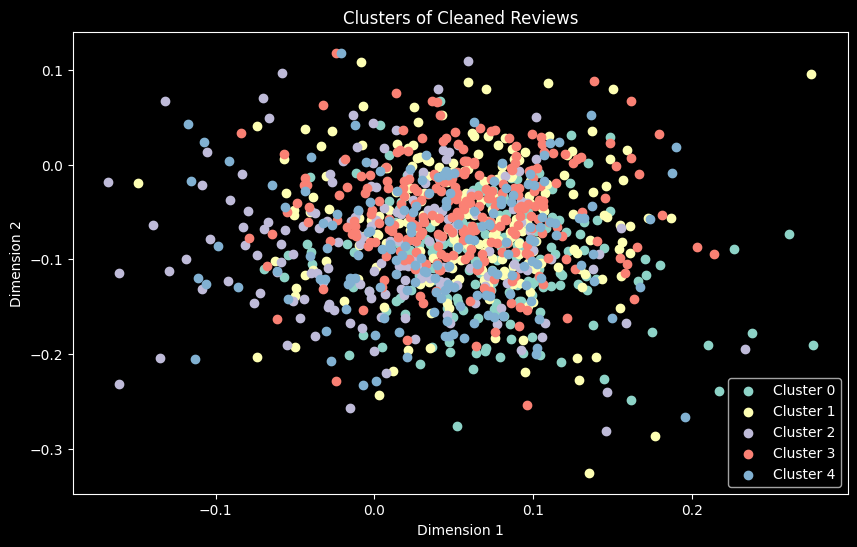

In [20]:
## Apply Kmeans to the average vector embedding to cluster the cleaned
## reviews. Color code the clusters using the review labels.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize KMeans with the desired number of clusters
num_clusters = 5  # Adjust this based on your preference or analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans to the average vector embeddings
kmeans.fit(average_embeddings)

# Predict the cluster labels for each average vector embedding
cluster_labels = kmeans.labels_

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))

for cluster_label in range(num_clusters):
    # Select embeddings belonging to the current cluster
    cluster_embeddings = average_embeddings[cluster_labels == cluster_label]
    # Plot the embeddings of the current cluster with color-coded labels
    plt.scatter(cluster_embeddings[:, 0], cluster_embeddings[:, 1], label=f'Cluster {cluster_label}')

plt.title('Clusters of Cleaned Reviews')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()
